<a href="https://colab.research.google.com/github/thianjin/SCB_ET_ML_Training/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
(xtr,ytr),(xts,yts) = fashion_mnist.load_data()

In [35]:

names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(names)

10

In [3]:
print(xtr.shape)
print(xts.shape)
print(ytr.shape)
print(yts.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


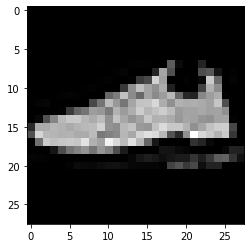

In [36]:
plt.imshow(xtr[55180],cmap='gray')
plt.show()

In [23]:
ytr[55180]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [37]:
names[ytr[55180]]

'Sneaker'

## Preprocessing of data

In [ ]:
ytr

In [38]:
# for multiclass classification, we need to onehotencode the labels
from tensorflow.keras.utils import to_categorical
ytr = to_categorical(ytr)
print(ytr.shape)
yts = to_categorical(yts)
print(yts.shape)

(60000, 10)
(10000, 10)


In [39]:
# converting images into channel format
print(xtr.shape)
print(xts.shape)

(60000, 28, 28)
(10000, 28, 28)


In [46]:
#resize the image to Channel Format
xtr = xtr.reshape(60000,28,28,1)
xts = xts.reshape(10000,28,28,1)
print(xtr.shape)
print(xts.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## modelling of Neural Network

In [47]:
from tensorflow.keras import models,layers

In [48]:
# creating input layer
input_layer = layers.Input(shape=(28,28,1))
c1 = layers.Conv2D(filters=6,kernel_size=(3,3),activation='relu')(input_layer)
p1 = layers.MaxPooling2D(pool_size=(2,2))(c1)
c2 = layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu')(p1)
p2 = layers.MaxPooling2D(pool_size=(2,2))(c2)
# add a flatten layer
ft = layers.Flatten()(p2)
# add the first hidden layer -> full connnected layer where each neuron does weighted sum and activation function. such layers in tensorflow are termed as dense layers
h1 = layers.Dense(120,activation='relu')(ft)
# add the second hidden layer
h2 = layers.Dense(84,activation='relu')(h1)
# add the final output layer
output_layer = layers.Dense(10,activation='softmax')(h2)
model = models.Model(inputs=input_layer,outputs=output_layer)
model.summary()


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 120)               4812

In [49]:
# metrics - to check performance of the model e.g. - accuracy, recall, r2 score
# optmizier - the optmizier which will update the weights and bais to minimize the error function, e.g. adam, sgd, RMSProp => we prefer using adam as it tunes learning rate automaticalllu
# loss = how the overall error to be calculated, for regression - mse , for two class classification - binary_crossentropy, for multiclass classification - categorical_crossentropy
model.compile(metrics=['accuracy'],optimizer='adam',loss='categorical_crossentropy')
model.fit(xtr,ytr,epochs=10,batch_size=1000,validation_data=(xts,yts))

Epoch 1/10
60/60 [==============================] - 32s 11ms/step - loss: 4.2294 - accuracy: 0.5876 - val_loss: 1.0871 - val_accuracy: 0.7158
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 0.8756 - accuracy: 0.7450 - val_loss: 0.7838 - val_accuracy: 0.7578
Epoch 3/10
60/60 [==============================] - 0s 7ms/step - loss: 0.6880 - accuracy: 0.7786 - val_loss: 0.6552 - val_accuracy: 0.7822
Epoch 4/10
60/60 [==============================] - 0s 6ms/step - loss: 0.5872 - accuracy: 0.8011 - val_loss: 0.5920 - val_accuracy: 0.7986
Epoch 5/10
60/60 [==============================] - 0s 7ms/step - loss: 0.5354 - accuracy: 0.8146 - val_loss: 0.5540 - val_accuracy: 0.8052
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.4969 - accuracy: 0.8269 - val_loss: 0.5224 - val_accuracy: 0.8144
Epoch 7/10
60/60 [==============================] - 0s 6ms/step - loss: 0.4638 - accuracy: 0.8359 - val_loss: 0.4947 - val_accuracy: 0.8251
Epoch 8/10
60/60 [

TypeError: ignored

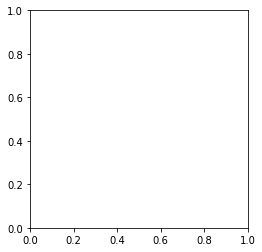

In [30]:
plt.imshow(xts[60].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
prob = model.predict(xts[450].reshape(1,28,28))
np.argmax(prob)

3

In [ ]:
names[3]

'Dress'

In [ ]:
!wget -q https://cdn.shopify.com/s/files/1/0011/9783/4252/products/20_375a8763-f5d7-4184-a352-4523ef713733_900x.jpg

In [ ]:
!wget -q https://s-media-cache-ak0.pinimg.com/736x/f1/2a/28/f12a2840240023960fbfa92dc944a648.jpg

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.img_to_array(image.load_img("f12a2840240023960fbfa92dc944a648.jpg",target_size=(28,28),grayscale=True))
img.shape

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(28, 28, 1)

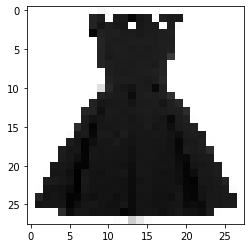

In [ ]:
plt.imshow(img.reshape(28,28),cmap='gray')
plt.show()

In [ ]:
proba = model.predict(img.reshape(1,28,28))
np.argmax(proba)

6

In [ ]:
names[6]

'Shirt'